In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from math import pi


df_IP = pd.read_excel('C:\Mission_IP.xlsx',sheet_name = 'IP')
df_IP = df_IP.dropna()
df_IP = df_IP.reset_index(drop=True)

df_CMD = pd.read_excel('C:\Mission_IP.xlsx',sheet_name = 'CMD')

df_CHU = pd.read_excel('C:\Mission_IP.xlsx',sheet_name = 'CHRU2018')
df_CHU = df_CHU.dropna()

df_IP





,Code,DMS,DMSPUB,EFFECTIF,NbJours,NbJoursAtt,IP-DMS
0,01C031,4.30,4.28,632,2717.60,2704.96,1.004673
1,01C032,7.65,7.62,1491,11406.15,11361.42,1.003937
2,01C033,14.36,14.15,1294,18581.84,18310.10,1.014841
3,01C034,40.96,39.85,1031,42229.76,41085.35,1.027854
4,01C041,5.27,5.30,4803,25311.81,25455.90,0.994340
...,...,...,...,...,...,...,...
2155,27Z021,12.50,12.46,36,450.00,448.56,1.003210
2156,27Z022,31.02,27.73,264,8189.28,7320.72,1.118644
2157,27Z023,38.26,36.89,265,10138.90,9775.85,1.037137
2158,27Z024,52.94,51.61,1078,57069.32,55635.58,1.025770


In [8]:
IP = pd.DataFrame(columns = ['Code','NbJours','NbJoursAtt','IP-DMS'])
IP

liste_code = []
liste_nbJours = []
liste_nbJoursAtt = []
liste_ipDms = [] 


for ind in df_IP.index: 
        
        code = df_IP['Code'][ind]
        nbJours = df_IP['NbJours'][ind]
        nbJoursAtt = df_IP['NbJoursAtt'][ind]
        
        ip_dms = nbJours/nbJoursAtt                 #Remplissage des listes
        liste_nbJours.append(nbJours)
        liste_code.append(code)
        liste_nbJoursAtt.append(nbJoursAtt)
        liste_ipDms.append(ip_dms)
        
IP['Code'] = liste_code
        
IP['NbJours'] = liste_nbJours
IP['NbJoursAtt'] = liste_nbJoursAtt       
                         # Remplissage du dataframe selon les valeurs des listes
IP['IP-DMS'] = liste_ipDms
IP.fillna("0", inplace = True)

IP
  

,Code,NbJours,NbJoursAtt,IP-DMS
0,01C031,2717.60,2704.96,1.004673
1,01C032,11406.15,11361.42,1.003937
2,01C033,18581.84,18310.10,1.014841
3,01C034,42229.76,41085.35,1.027854
4,01C041,25311.81,25455.90,0.994340
...,...,...,...,...
2155,27Z021,450.00,448.56,1.003210
2156,27Z022,8189.28,7320.72,1.118644
2157,27Z023,10138.90,9775.85,1.037137
2158,27Z024,57069.32,55635.58,1.025770


In [9]:
df_IP

,Code,DMS,DMSPUB,EFFECTIF,NbJours,NbJoursAtt,IP-DMS
0,01C031,4.30,4.28,632,2717.60,2704.96,1.004673
1,01C032,7.65,7.62,1491,11406.15,11361.42,1.003937
2,01C033,14.36,14.15,1294,18581.84,18310.10,1.014841
3,01C034,40.96,39.85,1031,42229.76,41085.35,1.027854
4,01C041,5.27,5.30,4803,25311.81,25455.90,0.994340
...,...,...,...,...,...,...,...
2155,27Z021,12.50,12.46,36,450.00,448.56,1.003210
2156,27Z022,31.02,27.73,264,8189.28,7320.72,1.118644
2157,27Z023,38.26,36.89,265,10138.90,9775.85,1.037137
2158,27Z024,52.94,51.61,1078,57069.32,55635.58,1.025770


In [10]:
codes = df_IP["Code"].str[:2]   # Sélection des 2 premiers caractères du code

tri = df_IP.groupby(codes)["IP-DMS"].mean()   # Moyenne de l'IP-DMS par code
df = pd.DataFrame(tri)                 
df.columns = ['IP-DMS Moyen']

Libelle = ['Affections du système nerveux', 'Affections de l œil', 'Affections des oreilles, du nez, de la gorge, de la bouche et des dents', 'Affections de l appareil respiratoire','Affections de l appareil circulatoire','Affections du tube digestif','Affections du système hépatobiliaire et du pancréas','Affections et traumatismes de l appareil musculosquelettique et du tissu conjonctif','Affections de la peau, des tissus sous-cutanés et des seins','Affections endocriniennes, métaboliques et nutritionnelles','Affections du rein et des voies urinaires','Affections de l appareil génital masculin','Affections de l appareil génital féminin','Grossesses pathologiques, accouchements et affections du post-partum','Nouveau-nés, prématurés et affections de la période périnatale','Affections du sang et des organes hématopoïétiques','Affections myéloprolifératives et tumeurs de siège imprécis ou diffus et/ou CMA','Maladies infectieuses et parasitaires','Maladies et troubles mentaux','Troubles mentaux organiques liés à l absorption de drogues ou induits par celles-ci','Traumatismes, allergies et empoisonnements','Brûlures','Facteurs influant sur l état de santé et autres motifs de recours aux services de santé','Maladies dues à une infection par le VIH','Traumatismes multiples graves','Transplantations d organes']
df['Libelle'] = Libelle

df = df[['Libelle', 'IP-DMS Moyen']]

df


,Libelle,IP-DMS Moyen
Code,,
01,Affections du système nerveux,0.984854
02,Affections de l œil,1.021401
03,"Affections des oreilles, du nez, de la gorge, ...",1.000764
04,Affections de l appareil respiratoire,0.970966
05,Affections de l appareil circulatoire,0.982991
06,Affections du tube digestif,1.013150
07,Affections du système hépatobiliaire et du pan...,1.007852
08,Affections et traumatismes de l appareil muscu...,1.005731
09,"Affections de la peau, des tissus sous-cutanés...",1.031558


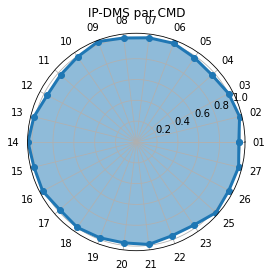

In [11]:


labels=np.array(df.index)
stats=np.array(df['IP-DMS Moyen'])
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=3)
ax.fill(angles, stats, alpha=1.5)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title("IP-DMS par CMD",loc='center')
ax.grid(True)


In [12]:
codes = df_IP["Code"].str[2]
tri = df_IP.groupby(codes)["IP-DMS"].mean()
df = pd.DataFrame(tri)
df.columns = ['IP-DMS Moyen']


Libelle = ['Chirurgie', 'Interventionnel', 'Maladie', 'Reste']

df['Libelle'] = Libelle
df = df[['Libelle','IP-DMS Moyen']]

df




,Libelle,IP-DMS Moyen
Code,,
C,Chirurgie,1.018947
K,Interventionnel,0.997182
M,Maladie,0.981159
Z,Reste,1.002886


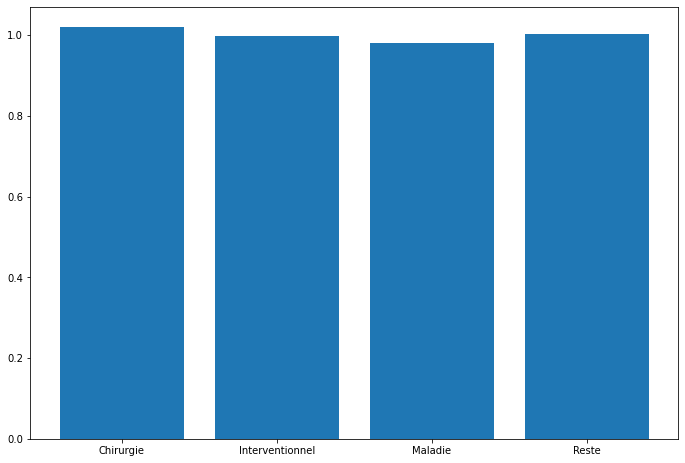

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
libelle = df['Libelle']
IP = df['IP-DMS Moyen']
ax.bar(libelle,IP)
plt.show()